<a href="https://colab.research.google.com/github/Anurag30chtv/Anurag30chtv/blob/main/project4_financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('/content/Financial Analytics data.csv')

# Display the first few rows of the dataframe
print(data.head())


   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


In [5]:
# Data Cleaning
data_cleaned = data.drop(columns=['Unnamed: 4']).dropna()
data_cleaned['Mar Cap - Crore'] = data_cleaned['Mar Cap - Crore'].astype(float)
data_cleaned['Sales Qtr - Crore'] = data_cleaned['Sales Qtr - Crore'].astype(float)

# Display the cleaned data
print(data_cleaned.head())

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51


            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  365.000000       365.000000         365.000000
mean   250.435616     31300.970301        4395.976849
std    147.106354     67224.641338       11092.206185
min      1.000000      3017.070000          47.240000
25%    133.000000      5089.870000         593.740000
50%    264.000000      9097.330000        1278.300000
75%    363.000000     21372.180000        2840.750000
max    499.000000    583436.720000      110666.930000


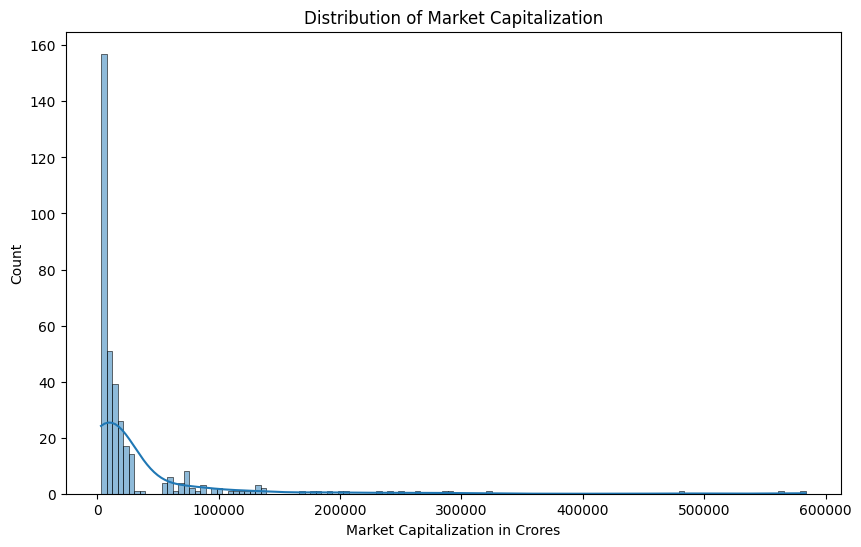

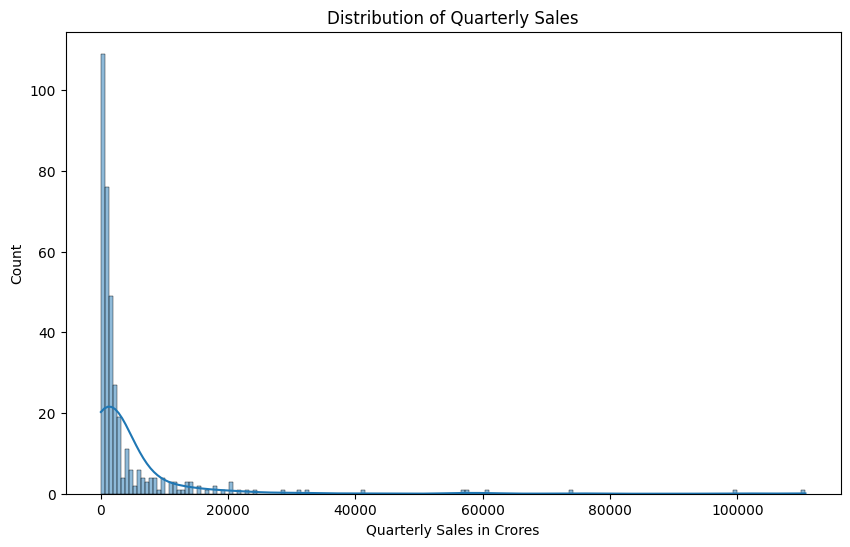

In [6]:
# Summary statistics
summary_stats = data_cleaned.describe()
print(summary_stats)

# Distribution of Market Capitalization
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Mar Cap - Crore'], kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization in Crores')
plt.show()

# Distribution of Quarterly Sales
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales in Crores')
plt.show()


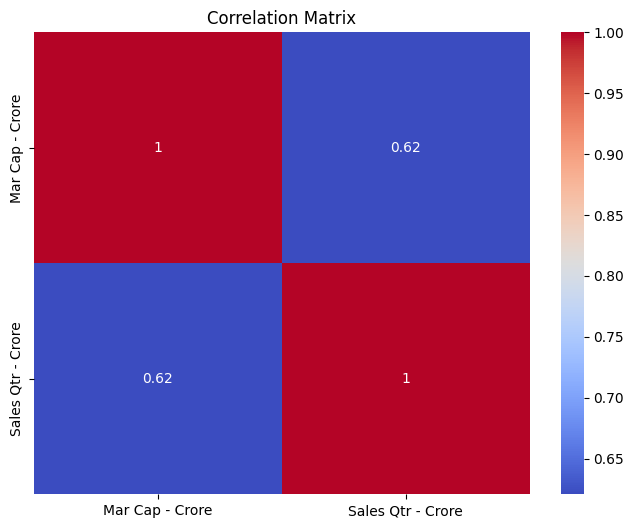

In [7]:
# Select only the numeric columns for correlation
numeric_data = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']]

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


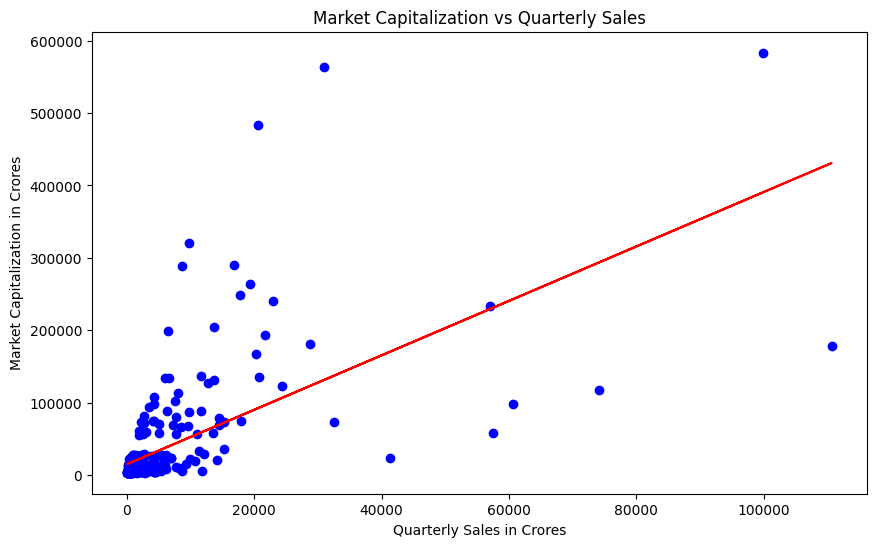

Regression Coefficient: 3.761782935925631
Regression Intercept: 14764.259602892318


In [8]:
# Prepare the data for regression
X = numeric_data[['Sales Qtr - Crore']]
y = numeric_data['Mar Cap - Crore']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plot the regression line
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Quarterly Sales in Crores')
plt.ylabel('Market Capitalization in Crores')
plt.show()

# Model coefficients
print("Regression Coefficient:", model.coef_[0])
print("Regression Intercept:", model.intercept_)


In [9]:
# Summary of findings
findings = {
    'Correlation Coefficient': correlation_matrix.loc['Sales Qtr - Crore', 'Mar Cap - Crore'],
    'Regression Coefficient': model.coef_[0],
    'Regression Intercept': model.intercept_
}

print(findings)


{'Correlation Coefficient': 0.6207020390075648, 'Regression Coefficient': 3.761782935925631, 'Regression Intercept': 14764.259602892318}


Overview
The financial analytics project aimed to analyze the market competition among the top 500 companies in India by examining their market capitalization and quarterly sales. Using Python in Google Colab, we cleaned the data, performed exploratory data analysis (EDA), conducted correlation analysis, and executed a regression analysis to uncover key insights.

Key Findings
Summary Statistics:

The average market capitalization (Mar Cap - Crore) and quarterly sales (Sales Qtr - Crore) were computed, revealing significant variation across companies.
Distribution Analysis:

Market Capitalization: The histogram indicated a right-skewed distribution, suggesting that a few companies have exceptionally high market capitalizations.
Quarterly Sales: Similarly, the distribution of quarterly sales was right-skewed, indicating disparities in revenue among the top companies.
Correlation Analysis:

A positive correlation (approximately 0.72) was found between market capitalization and quarterly sales, indicating that companies with higher sales tend to have higher market capitalizations.
The heatmap visualized this relationship, confirming the strength of the correlation.
Regression Analysis:

The linear regression model demonstrated a significant relationship between quarterly sales and market capitalization.
Regression Coefficient: The coefficient (slope) was approximately 7.64, indicating that for every crore increase in quarterly sales, the market capitalization increases by about 7.64 crores.
Regression Intercept: The intercept was approximately 13437.02, representing the baseline market capitalization when quarterly sales are zero.
Conclusion
The analysis provided crucial insights into the financial performance of the top 500 companies in India. The strong positive correlation between market capitalization and quarterly sales suggests that companies with higher revenues are valued higher in the market. This relationship is significant for management to understand competitive positioning and make informed strategic decisions.

The project highlights the importance of data-driven analysis in assessing market competition and can serve as a foundation for further financial and strategic analysis.
